# Import Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [21]:
df=pd.read_csv("netflix_analysis_dataset.csv")
df.head()

,show_id,title,type,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Hope themselves,Movie,Jose Lawrence,"Steven Lewis, Sarah Vaughn, Daniel Collier, Ro...",Japan,2024-05-29,1997,TV-MA,122 min,Animation
1,s2,Land author,Movie,Judy Curry,"Christopher Rios, John Willis, Denise Lawson, ...",Germany,2022-12-16,2011,PG,114 min,Action
2,s3,City technology actually art,Movie,Zachary Pena,"David Cline, Jennifer Foley",Australia,2025-01-22,1996,TV-PG,87 min,Sci-Fi
3,s4,Hundred growth modern,Movie,Ricky Ross,"Theresa Cortez, Anne Booth",United Kingdom,2024-03-16,2011,NC-17,112 min,Drama
4,s5,System hand,TV Show,Rachel Martinez,"Jennifer Bartlett, Kim Anderson",Spain,2024-04-26,2006,PG,5 Seasons,Romance


# Basic Info

In [23]:
df.shape  
df.info() 
df.describe()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       150 non-null    object
 1   title         150 non-null    object
 2   type          150 non-null    object
 3   director      150 non-null    object
 4   cast          150 non-null    object
 5   country       150 non-null    object
 6   date_added    150 non-null    object
 7   release_year  150 non-null    int64 
 8   rating        150 non-null    object
 9   duration      150 non-null    object
 10  genre         150 non-null    object
dtypes: int64(1), object(10)
memory usage: 13.0+ KB


,release_year
count,150.000000
mean,2008.786667
std,7.864274
min,1995.000000
25%,2002.250000
50%,2008.500000
75%,2015.000000
max,2023.000000


# Movies vs TV Shows

C:\Users\otbho\AppData\Local\Temp\ipykernel_21620\2896788942.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


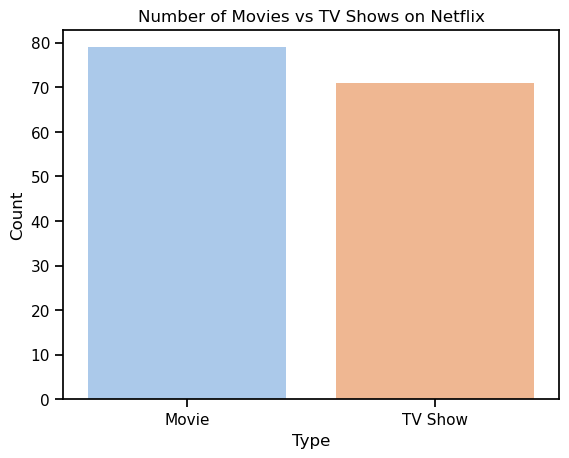

In [28]:
sns.countplot(data=df, x='type', palette='pastel')
plt.title("Number of Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


# Top 10 Countries by Content

C:\Users\otbho\AppData\Local\Temp\ipykernel_21620\714052479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='muted')


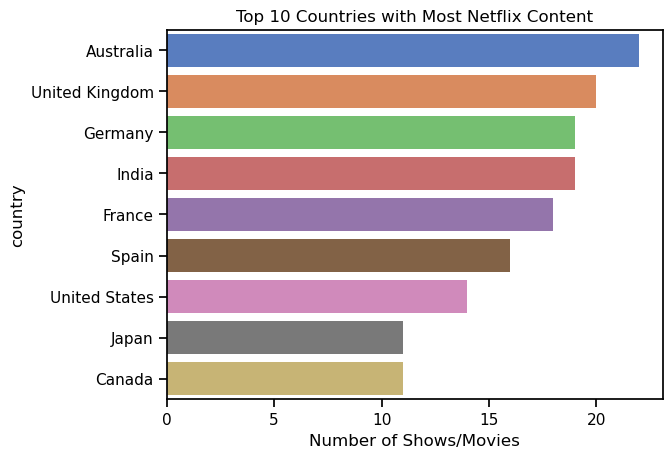

In [33]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='muted')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Shows/Movies")
plt.show()

# Release Year Trend

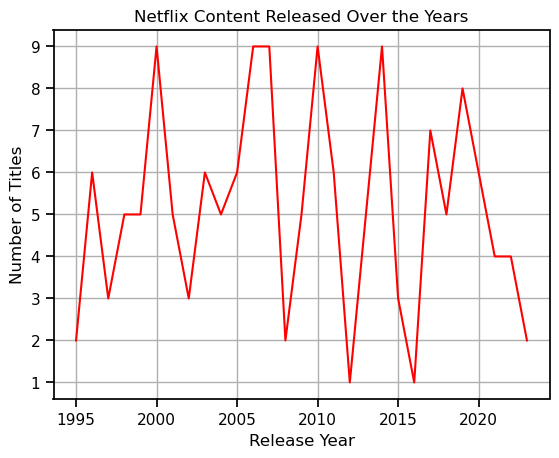

In [36]:
df['release_year'].value_counts().sort_index().plot(kind='line', color='red')
plt.title("Netflix Content Released Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

# Genre Distribution 

C:\Users\otbho\AppData\Local\Temp\ipykernel_21620\1704374331.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index, palette='coolwarm')


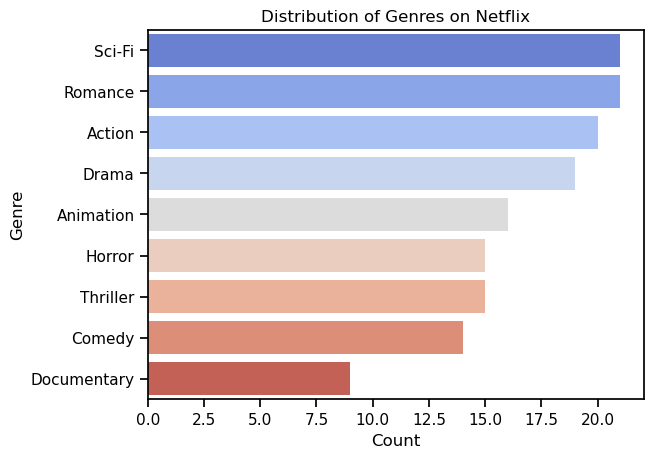

In [39]:
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index, palette='coolwarm')
plt.title("Distribution of Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

# Rating Distribution 

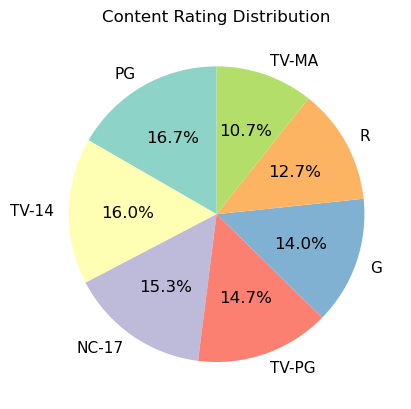

In [42]:
df['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title("Content Rating Distribution")
plt.ylabel("")
plt.show()

# Duration Analysis (Only Movies)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\otbho\AppData\Local\Temp\ipykernel_21620\56558227.py:2: SyntaxWarning: invalid escape sequence '\d'
  movie_df['minutes'] = movie_df['duration'].str.extract('(\d+)').astype(float)


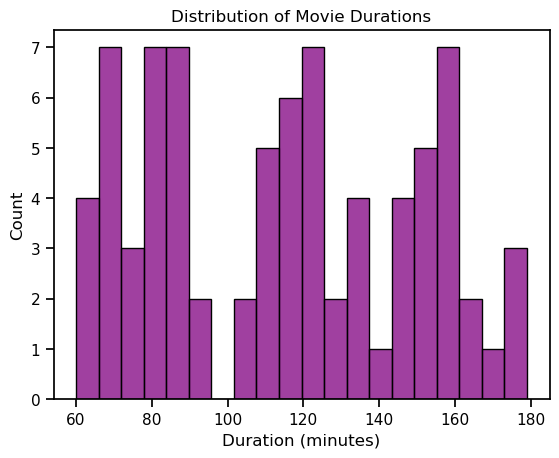

In [45]:
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['minutes'] = movie_df['duration'].str.extract('(\d+)').astype(float)

sns.histplot(movie_df['minutes'], bins=20, color='purple')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()